In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Semester 6\Artificial Intelligence\Project\Spam Email Prediction\project\emails.csv')

In [3]:
df.sample(5)

,text,spam
2117,"Subject: risk report on "" guide to electricxit...",0
1086,Subject: judicial judgements child support ve...,1
4470,"Subject: re : real options vince , if you ta...",0
1842,"Subject: houston trip vasant , so sorry for ...",0
4965,"Subject: electricity prices vince , please f...",0


In [4]:
df.shape

(5728, 2)

In [ ]:
# 1. Data cleaning
# 2. visualization
# 3. Text Preprocessing
# 4. Model building


1. Data Cleaning

In [12]:
# missing values
print(df.isnull().sum())

text    0
spam    0
dtype: int64


In [ ]:
print(df.duplicated().sum())

33


In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
print(df.duplicated().sum())

0


2.visualization

In [17]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

In [18]:
#imbalance dataset
import nltk

In [ ]:
# nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hasnain\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,text,spam,num_words,num_characters
0,Subject: naturally irresistible your corporate...,1,325,1484
1,Subject: the stock trading gunslinger fanny i...,1,90,598
2,Subject: unbelievable new homes made easy im ...,1,88,448
3,Subject: 4 color printing special request add...,1,99,500
4,"Subject: do not have money , get software cds ...",1,53,235


In [23]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,text,spam,num_words,num_characters
0,Subject: naturally irresistible your corporate...,1,325,1484
1,Subject: the stock trading gunslinger fanny i...,1,90,598
2,Subject: unbelievable new homes made easy im ...,1,88,448
3,Subject: 4 color printing special request add...,1,99,500
4,"Subject: do not have money , get software cds ...",1,53,235


<Axes: xlabel='num_characters', ylabel='Count'>

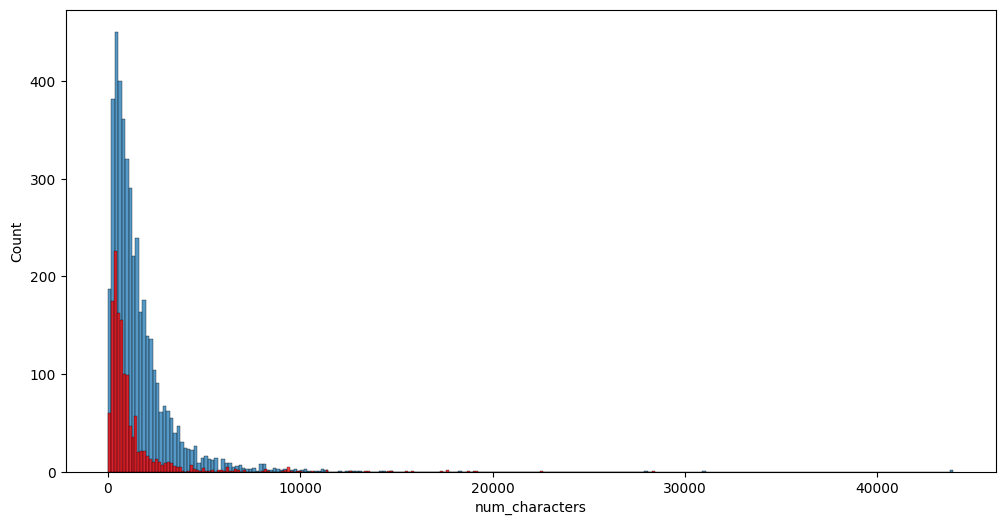

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_characters'])
sns.histplot(df[df['spam'] == 1]['num_characters'],color='red')

In [28]:
# Data Preprocessing
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [ ]:
import nltk
import os


# Download inside the virtual environment
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')   



[nltk_data] Downloading package punkt_tab to
[nltk_data]     d:\MachineLearnng\NLP\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     d:\MachineLearnng\NLP\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     d:\MachineLearnng\NLP\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

print(transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."))

gon na home soon want talk stuff anymor tonight k cri enough today


In [28]:
df['text'][10]

"Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . "

In [29]:
ps.stem('loving')

'love'

In [30]:
df['transformed_text'] = df['text'].apply(transform_text)

In [31]:
df.head()

,text,spam,num_words,num_characters,transformed_text
0,Subject: naturally irresistible your corporate...,1,325,1484,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,90,598,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,88,448,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,99,500,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,53,235,subject money get softwar cd softwar compat gr...


In [32]:
spam_corpus = []
for msg in df[df['spam'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [33]:
len(spam_corpus)

174630

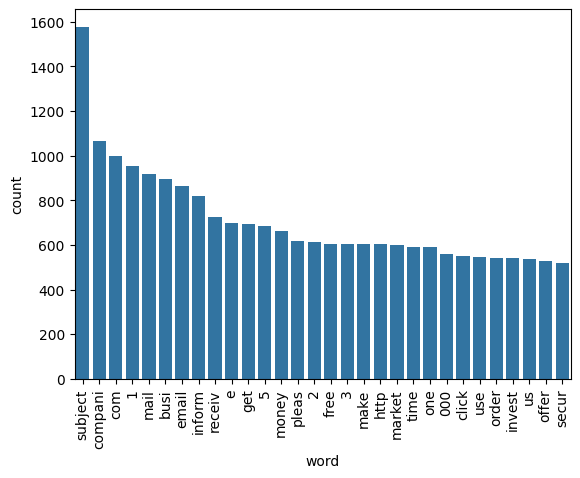

In [34]:
from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
ham_corpus = []
for msg in df[df['spam'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [36]:
len(ham_corpus)

702991

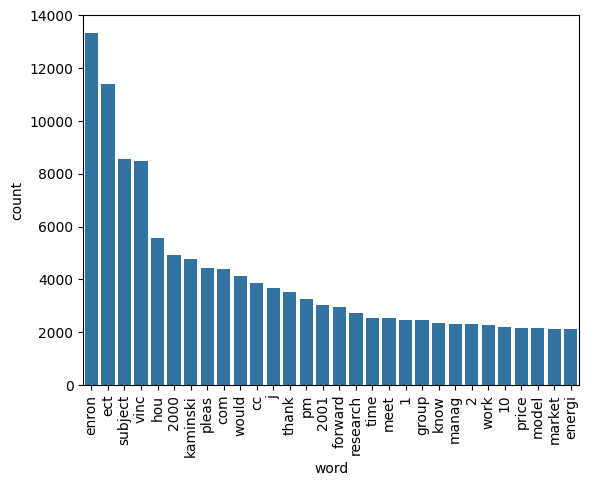

In [37]:
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [40]:
X.shape

(5695, 3000)

In [41]:
y = df['spam'].values

In [42]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95171202809482
[[837  12]
 [ 43 247]]
0.9536679536679536


In [80]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9850746268656716
[[846   3]
 [ 14 276]]
0.989247311827957


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429323968393327
[[785  64]
 [  1 289]]
0.8186968838526912


In [493]:
# tfidf --> MNB

In [82]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))